In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [4]:
IMAGE_SIZE = 250
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 10

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Rice_Image_Dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 75000 files belonging to 5 classes.


In [6]:
class_names = dataset.class_names
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [7]:
len(dataset)

2344

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


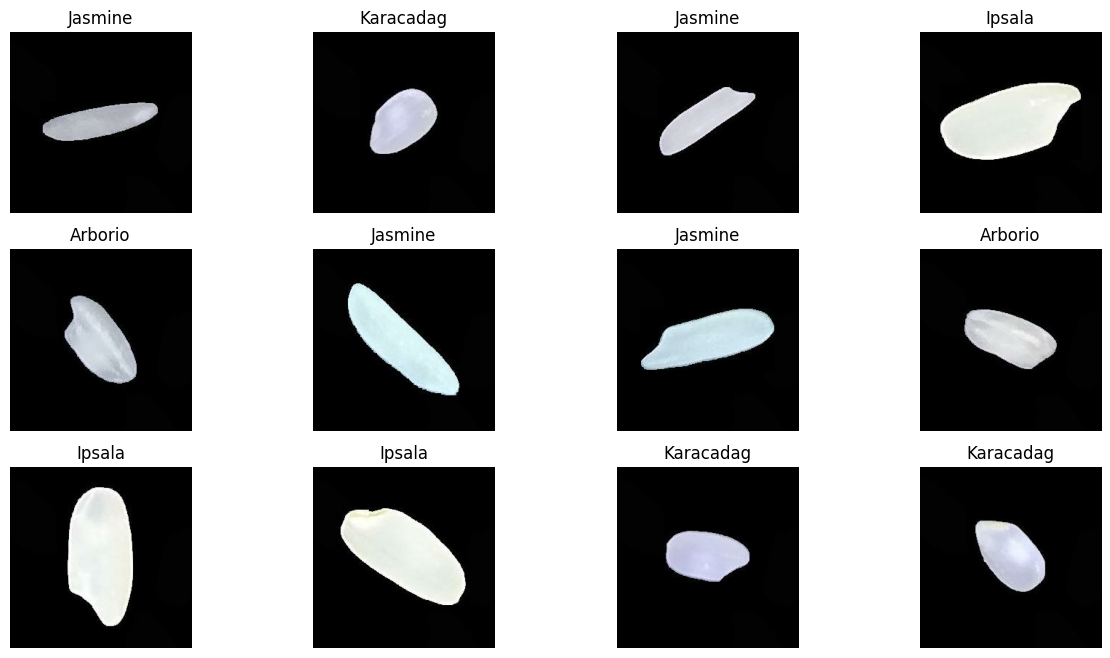

In [8]:
plt.figure(figsize = (15,8))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        print(image_batch[0].shape)

In [9]:
train_size = 0.8

In [10]:
train_ds = dataset.take(1875)
len(train_ds)

1875

In [11]:
test_ds = dataset.skip(1875)
len(test_ds)

469

In [12]:
val_size = 0.1
val_ds = test_ds.take(225)

In [13]:
test_ds = test_ds.skip(225)
len(test_ds)

244

In [14]:
def get_dataset_partitions_tf(ds,train_split = 0.8,val_split = 0.1,test_split = 0.1,shuffle = True,shuffle_size = 1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

1875

In [ ]:
len(val_ds)

In [ ]:
len(test_ds)

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [17]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/250)
])

In [18]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [19]:
# def rgb_to_grayscale(image):
#     return tf.image.rgb_to_grayscale(image)

In [20]:
# train_ds = train_ds.map(lambda x, y: (rgb_to_grayscale(x), y))
# val_ds = val_ds.map(lambda x, y: (rgb_to_grayscale(x), y))

In [21]:
n_classes = 5

# Create CNN model

In [3]:
input_size = (IMAGE_SIZE,IMAGE_SIZE,3) # 1 for greyscale 

model = models.Sequential([
    layers.InputLayer(input_shape = input_size), # Explicit input layer
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(n_classes,activation = 'softmax')
])
    

NameError: name 'IMAGE_SIZE' is not defined

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 248, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 124, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 122, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 59, 59, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 27, 27, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │       216,325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,741 (2.31 MB)

 Trainable params: 604,741 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [23]:
print('done')
history    = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

done
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2346s 1s/step - accuracy: 0.9193 - loss: 0.2278 - val_accuracy: 0.9611 - val_loss: 0.1117
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2037s 1s/step - accuracy: 0.9759 - loss: 0.0739 - val_accuracy: 0.9792 - val_loss: 0.0635
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8492s 5s/step - accuracy: 0.9822 - loss: 0.0543 - val_accuracy: 0.9844 - val_loss: 0.0481
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2444s 1s/step - accuracy: 0.9841 - loss: 0.0469 - val_accuracy: 0.9822 - val_loss: 0.0559
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1885s 1s/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 0.9856 - val_loss: 0.0471
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2089s 1s/step - accuracy: 0.9875 - loss: 0.0379 - val_accuracy: 0.9861 - val_loss: 0.0456
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2245s 1s/step - accuracy: 0.9885 - loss: 0.0367 - val_accuracy: 0.9879 - val_loss: 0.0364
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6913s 4s/step - accuracy: 0.9

In [2]:
scores = model.evaluate(test_ds)

NameError: name 'model' is not defined

In [1]:
scores

NameError: name 'scores' is not defined

In [29]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [30]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

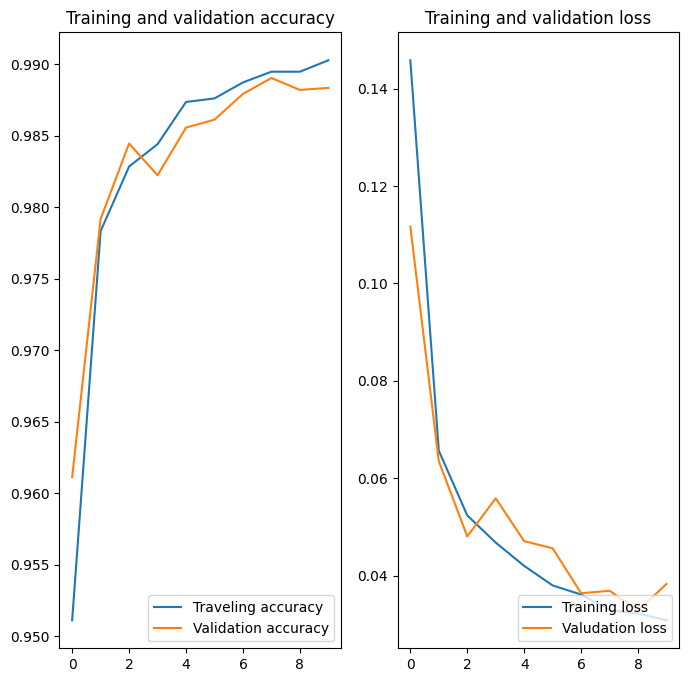

In [31]:
# Plotting 
plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label = 'Traveling accuracy')
plt.plot(range(EPOCHS),val_acc,label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label = 'Training loss')
plt.plot(range(EPOCHS),val_loss,label = 'Valudation loss')
plt.legend(loc = 'lower right')
plt.title('Training and validation loss')
plt.show()

First image to predict
Actual label:  Karacadag
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
Karacadag


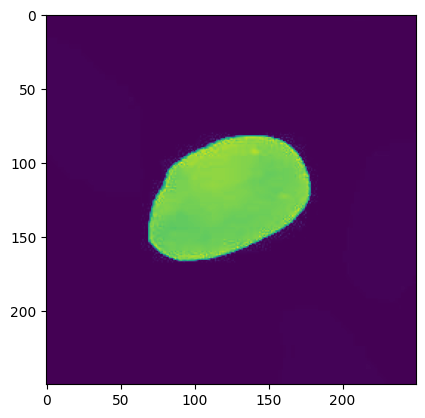

In [37]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0].numpy()
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])
    batch_prediction = model.predict(images_batch)
    print(class_names[np.argmax(batch_prediction[0])])

In [38]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # Create a batch

    prediction = model.predict(img_array)

    predictions = class_names[np.argmax(prediction[0])]
    
    confidence = round(100 * (np.max(prediction[0])),2)
    return predictions,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


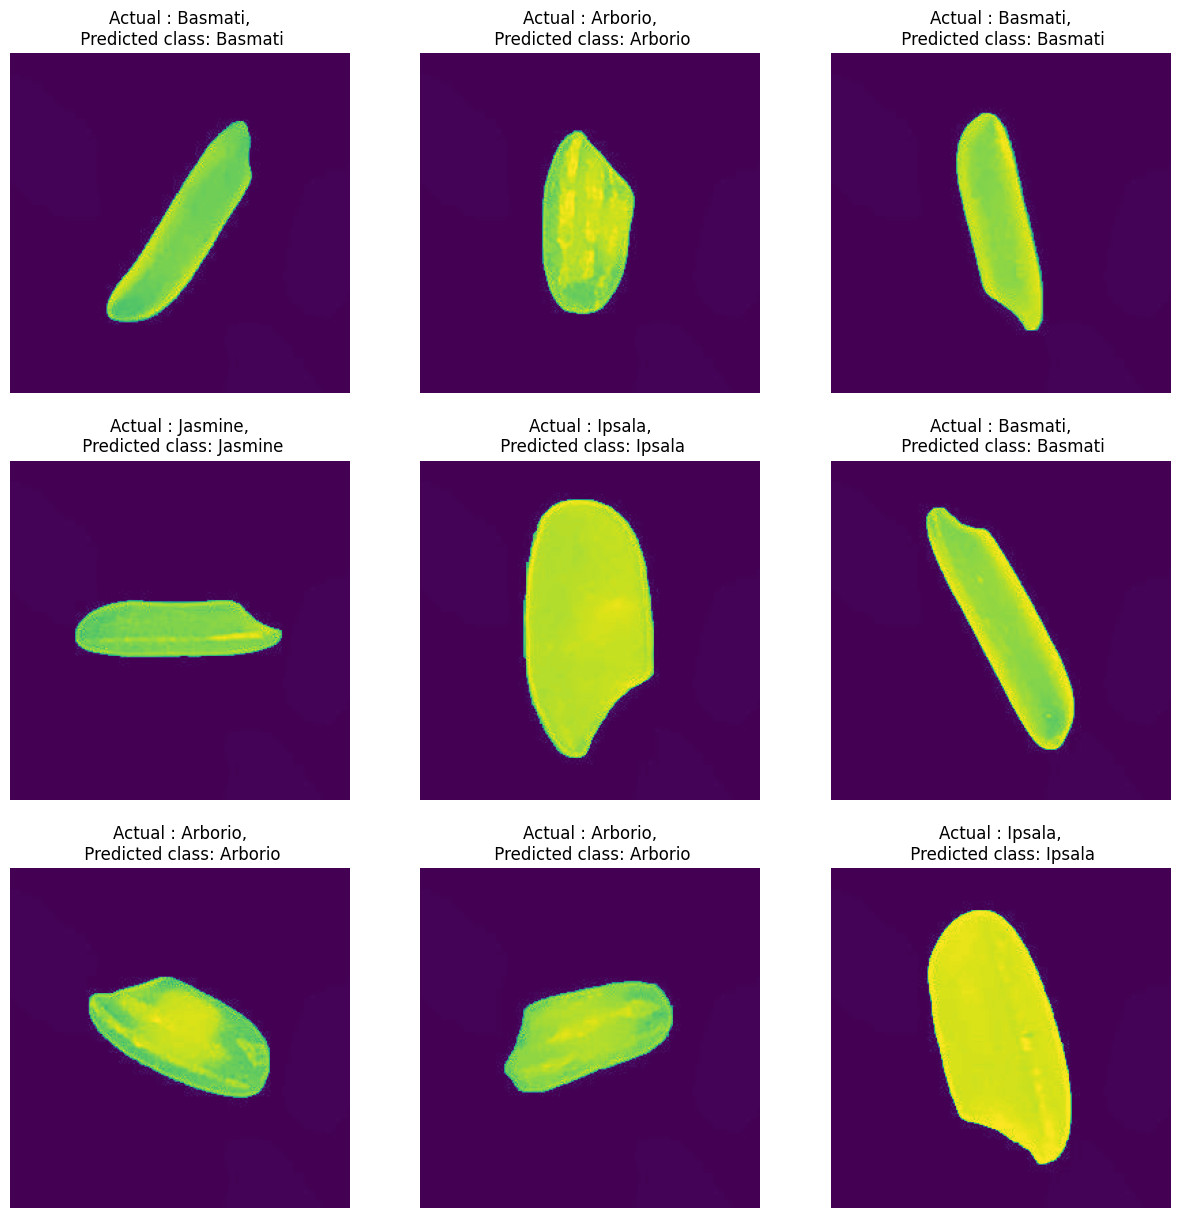

In [39]:
plt.figure(figsize = (15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predict_class,confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class},\n Predicted class: {predict_class}")
        plt.axis("off")
        

In [40]:
import os

# Define the path where you want to save the model
model_version = 1
save_dir = r"C:\Users\notebook\learn python\neu\CNN\rice species\model"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, f"{model_version}.keras"))
print("saved")

saved
